In [1]:
import os
import time

import torch
import torch.nn as nn
import torch.optim as opt
import torch.nn.functional as F
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
import shutil

# kaggle原始数据集地址
original_dataset_dir = 'F:/迅雷下载/kaggle/test1'
total_num = int(len(os.listdir(original_dataset_dir)) / 2)
random_idx = np.array(range(total_num))
np.random.shuffle(random_idx)
# 待处理的数据集地址
base_dir = 'F:/迅雷下载/kaggle/test1'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# 训练集、测试集的划分
sub_dirs = ['train_', 'test_']
animals = ['cats', 'dogs']
train_idx = random_idx[:int(total_num * 0.9)]
test_idx = random_idx[int(total_num * 0.9):]
numbers = [train_idx, test_idx]
for idx, sub_dir in enumerate(sub_dirs):
    dir = os.path.join(base_dir, sub_dir)
    if not os.path.exists(dir):
        os.mkdir(dir)
    for animal in animals:
        animal_dir = os.path.join(dir, animal)  #
        if not os.path.exists(animal_dir):
            os.mkdir(animal_dir)
        fnames = [animal[:-1] + '.{}.jpg'.format(i) for i in numbers[idx]]
        for fname in fnames:
            src = os.path.join(original_dataset_dir, fname)
            dst = os.path.join(animal_dir, fname)
            shutil.copyfile(src, dst)

        # 验证训练集、验证集、测试集的划分的照片数目
        print(animal_dir + ' total images : %d' % (len(os.listdir(animal_dir))))

In [3]:
"""数据准备"""
print("开始")
train_data = datasets.ImageFolder(root='F:/迅雷下载/kaggle/train/train_',
                                  transform=transforms.Compose(
                                      [
                                          transforms.Resize([224, 224]),
                                          transforms.ToTensor(),
                                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                      ]
                                  ))

开始


In [ ]:
"""数据准备"""
print("开始")
train_data = datasets.ImageFolder(root='F:/迅雷下载/kaggle/test1/',
                                  transform=transforms.Compose(
                                      [
                                          transforms.Resize([224, 224]),
                                          transforms.ToTensor(),
                                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                      ]
                                  ))

{'cats': 0, 'dogs': 1}
['cats', 'dogs']
0


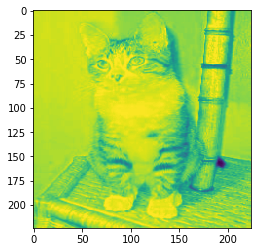

In [25]:
print(train_data.class_to_idx)
print(train_data.classes)
img = train_data[12][0]
label = train_data[10][1]
print(label)
plt.imshow(img[0, :])
plt.show()

In [ ]:
test_data = datasets.ImageFolder(root='F:/迅雷下载/kaggle/test1',
                                 transform=transforms.Compose(
                                     [
                                         transforms.Resize([224, 224]),
                                         transforms.ToTensor(),
                                         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                     ]
                                 ))
train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
test_loader = DataLoader(test_data, batch_size=8, shuffle=True)

img = test_data[10][0].numpy()
label = train_data[10][1]
print(label)
plt.imshow(img[0, :])
plt.show()

In [6]:

"""采用固定值方式迁移Resnet18网络"""
net = models.resnet18(pretrained=True)
for param in net.parameters():
    # 把参数冻结住，反向传播时不修改
    param.requires_grad = False
features = net.fc.in_features
net.fc = nn.Linear(features, 2)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(net.fc.parameters(), lr=0.001, momentum=0.9)

In [7]:

print(len(train_loader))
"""训练"""
enum_train_loader = enumerate(train_loader)

3108


In [8]:
for epoch in range(1):
    for i, data in enum_train_loader:
        x, y = data
        pred = net(x)
        loss = loss_fn(pred, y)

        opt.zero_grad()
        loss.backward()
        opt.step()
        # if i % 500 == 0:
        print(i / 250, "%")
    if epoch % 2 == 0:
        print(loss.data)

0.0 %
0.004 %
0.008 %
0.012 %
0.016 %
0.02 %
0.024 %
0.028 %
0.032 %
0.036 %
0.04 %
0.044 %
0.048 %
0.052 %
0.056 %
0.06 %
0.064 %
0.068 %
0.072 %
0.076 %
0.08 %
0.084 %
0.088 %
0.092 %
0.096 %
0.1 %
0.104 %
0.108 %
0.112 %
0.116 %
0.12 %
0.124 %
0.128 %
0.132 %
0.136 %
0.14 %
0.144 %
0.148 %
0.152 %
0.156 %
0.16 %
0.164 %
0.168 %
0.172 %
0.176 %
0.18 %
0.184 %
0.188 %
0.192 %
0.196 %
0.2 %
0.204 %
0.208 %
0.212 %
0.216 %
0.22 %
0.224 %
0.228 %
0.232 %
0.236 %
0.24 %
0.244 %
0.248 %
0.252 %
0.256 %
0.26 %
0.264 %
0.268 %
0.272 %
0.276 %
0.28 %
0.284 %
0.288 %
0.292 %
0.296 %
0.3 %
0.304 %
0.308 %
0.312 %
0.316 %
0.32 %
0.324 %
0.328 %
0.332 %
0.336 %
0.34 %
0.344 %
0.348 %
0.352 %
0.356 %
0.36 %
0.364 %
0.368 %
0.372 %
0.376 %
0.38 %
0.384 %
0.388 %
0.392 %
0.396 %
0.4 %
0.404 %
0.408 %
0.412 %
0.416 %
0.42 %
0.424 %
0.428 %
0.432 %
0.436 %
0.44 %
0.444 %
0.448 %
0.452 %
0.456 %
0.46 %
0.464 %
0.468 %
0.472 %
0.476 %
0.48 %
0.484 %
0.488 %
0.492 %
0.496 %
0.5 %
0.504 %
0.508 %
0.512 %


In [9]:
"保存模型"
# 保存
torch.save(net, 'net.pkl')
# 加载
model = torch.load('net.pkl')


In [10]:

"""测试"""
print("测试",time.ctime())
rights = 0
length = 0
for i, data in enumerate(test_loader):
    x, y = data

    pred = net(x)
    # print("pred: ", pred)
    # print("y: ", y)
    for j in range(len(y)):
        if pred[j][0] > 0 and y[j] == 0:
            rights += 1
        elif pred[j][1] > 0 and y[j] == 1:
            rights += 1
print("正确数:", rights, "准确率", rights / len(test_data) * 100, "%")

测试 Thu Jan  6 18:15:01 2022
正确数: 2708 准确率 92.10884353741497 %
